## KMeans

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
spotify = pd.read_csv('../Data/spotify_cleaned.csv', index_col='track_id')
spotify_encoded = pd.read_csv('../Data/spotify_encoded.csv', index_col='track_id')
spotify_encoded

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_id,,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,1.782627,0.024575,-0.305767,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4qPNDBW1i3p13qLCt0Ki3A,0.975633,-0.730859,-0.305767,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1iJBSr7s7jYXzM8EGcbK5b,1.065299,-0.160332,-0.305767,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6lfxq3CG4xtTiEg7opyCyx,1.692961,-0.243214,-0.305767,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5vjLSffimiIP26QG5WcN2K,2.186125,-0.271919,-0.305767,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2C3TZjDRiAzdyViavDJ217,-0.548691,1.462944,-0.305767,-2.274962,-1.615656,-0.086838,-1.617326,0.753988,-0.401507,0.977652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1hIz5L4IB9hN3WRYPOCGPw,-0.503858,1.462953,-0.305767,-2.263437,-2.084789,-1.491343,-2.000082,-1.326281,-0.421369,2.042245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6x8ZfSoqDjuNa5SVP5QjvX,-0.503858,0.404827,-0.305767,0.358416,-1.241940,-1.491343,-0.524135,-1.326281,-0.403399,1.660315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


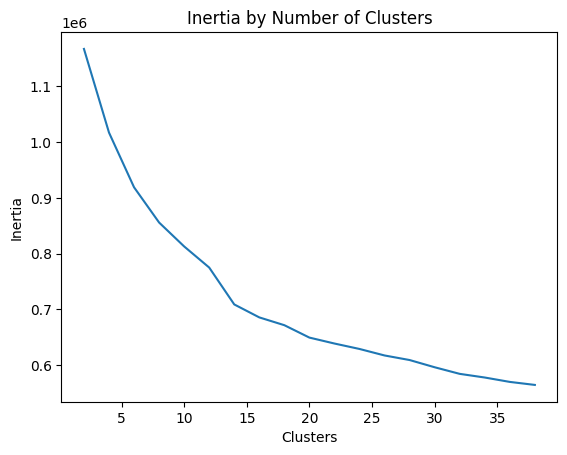

In [5]:
inertias = []
for k in np.arange(2, 40, 2):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spotify_encoded)

    inertias.append(kmeans.inertia_)

plt.plot(np.arange(2, 40, 2), inertias)
plt.title('Inertia by Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()



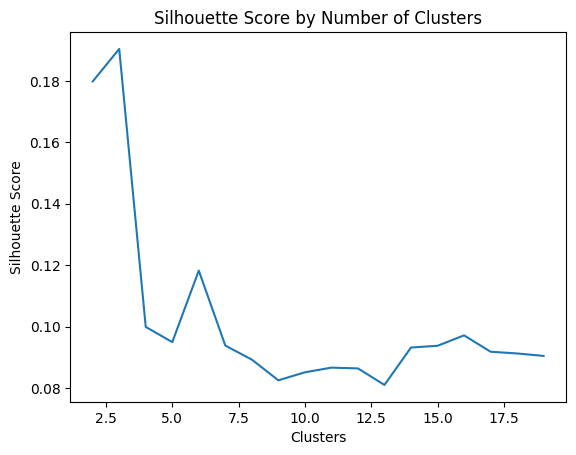

In [16]:
sils = []
for k in np.arange(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit(spotify_encoded).labels_
    sils.append(silhouette_score(spotify_encoded, labels))

plt.plot(np.arange(2, 20), sils)
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [7]:
num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(spotify_encoded)

KMeans(n_clusters=6, random_state=42)

In [8]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = spotify_encoded.columns.tolist()
cl_pos.drop([col for col in cl_pos.columns if col.startswith('track_genre_')], axis=1, inplace=True)
cl_pos

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.247816,-0.229332,3.234604,0.348575,0.311155,0.000714,0.299804,-0.104176,1.344632,-0.225882,-0.335058,0.170881,-0.031194,-0.024183,0.112663
1,-0.187010,-0.108843,-0.300173,-1.316475,-1.872114,-0.133508,-2.582423,0.035397,-0.310134,1.644485,1.958566,-0.248214,-1.145882,-0.649186,-0.840629
2,0.063745,0.096419,-0.279938,-0.376094,0.451230,-0.009788,0.185399,0.076842,0.426798,-0.004026,-0.263810,2.747261,0.014063,0.038732,0.016550
3,0.123750,-0.128554,-0.303037,-0.099422,-0.964013,-0.083786,-0.427499,0.238197,-0.262049,1.028996,-0.343347,-0.289370,-0.138953,-0.259762,-0.171572
4,0.166912,-0.048024,-0.305767,0.203084,0.542815,0.033621,0.472305,-0.085666,-0.003140,-0.522448,-0.429888,-0.193437,0.370445,0.195594,0.160998
5,-0.310178,0.762553,-0.290008,0.029479,0.427606,0.084310,-0.028109,-0.234812,-0.117826,-0.645489,1.924968,-0.221044,-0.537199,0.193301,0.081938


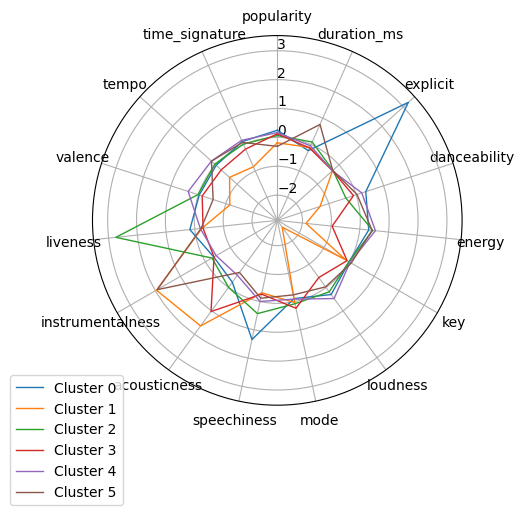

In [15]:
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
categories= radar_df.columns.tolist()[1:]
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)

for i in range(0, num_clusters):
    values=radar_df.loc[i].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle=None, label=f'Cluster {i}')
    #ax.fill(angles, values, 'b', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

In [10]:
def recommend_songs(track_ids, data, data_standard, clusters, top_n=5):
    input_clusters = clusters.loc[track_ids].unique()
    
    filter_mask = clusters.isin(input_clusters)
    filtered_data_standard = data_standard[filter_mask]
    filtered_data = data[filter_mask]
    
    input_vectors = filtered_data_standard.loc[track_ids].values
    distances = np.linalg.norm(filtered_data_standard.values[:, None] - input_vectors, axis=2).sum(axis=1)

    distance_df = pd.DataFrame(distances, index=filtered_data_standard.index, columns=['distance'])
    sorted_songs = distance_df.sort_values(by='distance')
    
    recommendations = sorted_songs.drop(track_ids).head(top_n)
    recommendations = recommendations[~recommendations.index.duplicated(keep='first')]
    
    return filtered_data.loc[recommendations.index][['track_name', 'artists', 'album_name', 'track_genre']]

In [11]:
clusters = pd.Series(kmeans.labels_, index=spotify.index)

classical_track_ids = ['5ljHk6rwIFtX83jenOl8Q3', '1iDb9PtzYXk5xYw7JkQ3VT', '4gj2XS6vLhDBuiduScHjRX']
spotify.loc[classical_track_ids][['track_name', 'artists', 'album_name', 'track_genre']]

,track_name,artists,album_name,track_genre
track_id,,,,
5ljHk6rwIFtX83jenOl8Q3,"Der Nussknacker, Op. 71: Schneeflockenwalzer",Pyotr Ilyich Tchaikovsky;phil Blech Wien;Anton...,Classical Christmas,classical
1iDb9PtzYXk5xYw7JkQ3VT,"Children's Corner, L. 113: I. Doctor Gradus Ad...",Claude Debussy;Seong-Jin Cho,Clsica para los nios de hoy,classical
4gj2XS6vLhDBuiduScHjRX,Bach : The Well-Tempered Clavier Book I. Fugue...,Johann Sebastian Bach;RIMA,Early Morning Classic,classical


In [12]:
recommended_songs = recommend_songs(classical_track_ids, spotify, spotify_encoded, clusters)
recommended_songs

,track_name,artists,album_name,track_genre
track_id,,,,
1VsXbdekUKQ0KJIBaqC96E,"4 Impromptus, Op. 90, D. 899: II. Allegro - Coda",Franz Schubert;Yanica Hristova,"Schubert: Impromptus, D. 899 - Baynov, Stoyano...",classical
2SNcSWDurvPuyfRveaJ9Qv,"Bagatelle in A Minor, WoO 59 ""Fr Elise""",Ludwig van Beethoven;Anatol Ugorski,Relajacin y siestas,classical
7A6xUNWiKHoZG1oQzypNJ2,"Piano Sonata No. 4 in E-Flat Major, K. 282: 1b...",Wolfgang Amadeus Mozart;Claire-Marie Le Guay,Mozart - All Day Classics,classical
1gUJXmcIstf3QSbowiWuPK,"Cello Sonata in C Major, Op. 119: II. Moderato",Sergei Prokofiev;Miriam K. Smith;Sandra Wright...,Momentum,classical
4vgWIKG0kmxliL4swyMhZc,"Concerto grosso in G Minor, Op. 6, No. 8, ""Fat...",Arcangelo Corelli;The English Concert;Trevor P...,Classical Christmas 2022,classical


In [13]:
pop_track_ids = ['0KKkJNfGyhkQ5aFogxQAPU', '6vJaXvEXh6HOeiEZLFDhrp', '0azC730Exh71aQlOt9Zj3y']
spotify.loc[pop_track_ids][['track_name', 'artists', 'album_name', 'track_genre']]

,track_name,artists,album_name,track_genre
track_id,,,,
0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,Bruno Mars,24K Magic,dance
6vJaXvEXh6HOeiEZLFDhrp,You Belong With Me (Taylors Version),Taylor Swift,Sunny Mornings,pop
0azC730Exh71aQlOt9Zj3y,This Is What You Came For,Calvin Harris;Rihanna,This Is What You Came For,dance


In [14]:
recommended_songs = recommend_songs(pop_track_ids, spotify, spotify_encoded, clusters)
recommended_songs

,track_name,artists,album_name,track_genre
track_id,,,,
6cmm1LMvZdB5zsCwX5BjqE,Down,Jay Sean;Lil Wayne,All Or Nothing,dance
59qrUpoplZxbIZxk6X0Bm3,Take You Dancing,Jason Derulo,Take You Dancing,dance
0ClPIeT6MSgfSgQ9ZrJbAq,Cheating on You,Charlie Puth,Cheating on You,dance
6T689Jvh5KrSXyaPtUWZtQ,Criminal,Britney Spears,Femme Fatale (Deluxe Version),dance
4vVTI94F9uJ8lHNDWKv0i2,Eenie Meenie,Sean Kingston;Justin Bieber,Eenie Meenie,dance
